# Metodo del descenso por el gradiente

Cómo encontramos el mínimo de la función costo cuando la vemos como función de los parámetros?

1. Estudiaremos una $f(x)$ donde $x$ no es ni los datos ni la predicción del modelo sino los parámetros de la red neuronal.

2. x puede ser un vector de dimensiones muy muy grandes.

Bibliografía: 

1. https://www.datacamp.com/tutorial/tutorial-gradient-descent
2. https://builtin.com/data-science/gradient-descent
3. https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

## El problema en contexto: 

Queremos ajustar parámetros de una función o modelo para que describa apropiadamente ciertos datos.


![ajuste](1_imhEKEpzX24CC_LIIureBw.gif)

![superficie](gradient_descent.webp)

### Función cónvexa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
#from mpl_toolkits.mplot3d import Axes3D

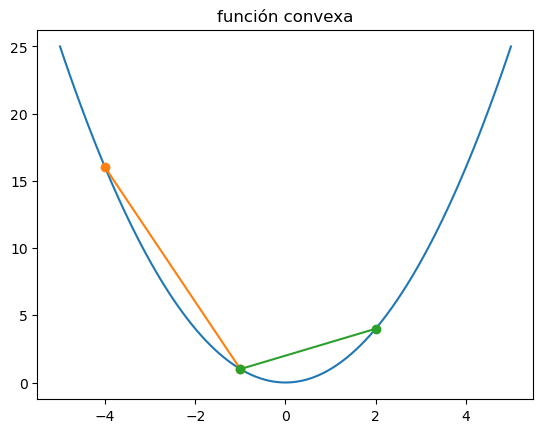

In [2]:
x = np.linspace(-5,5,100)
def f_conv(x): 
    return x**2

x1 = -4
x2 = -1
x3 = 2  
x4 = 4

plt.plot(x,f_conv(x))
plt.plot([x1,x2],[f_conv(x1), f_conv(x2)], marker='o')
plt.plot([x2,x3],[f_conv(x2), f_conv(x3)], marker='o')
plt.title('función convexa')
plt.show()

**Las funciones convexas tiene un único mínimo!**

Una función no convexa:

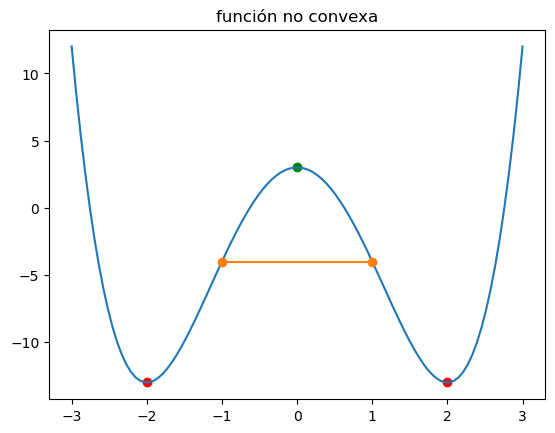

In [3]:
x = np.linspace(-3,3,100)
def f_no_conv(x): 
    return -8*x**2 + x**4 + 3

x1 = -1
x2 = 1
plt.plot(x,f_no_conv(x))
plt.plot([x1,x2],[f_no_conv(x1), f_no_conv(x2)], marker='o')
#plt.plot([x2,x3],[f_no_conv(x2), f_no_conv(x3)])
plt.scatter([-2,2],[f_no_conv(-2), f_no_conv(2)], color='r')
plt.scatter([0],[f_no_conv(0)], color='g')
plt.title('función no convexa')
plt.show()

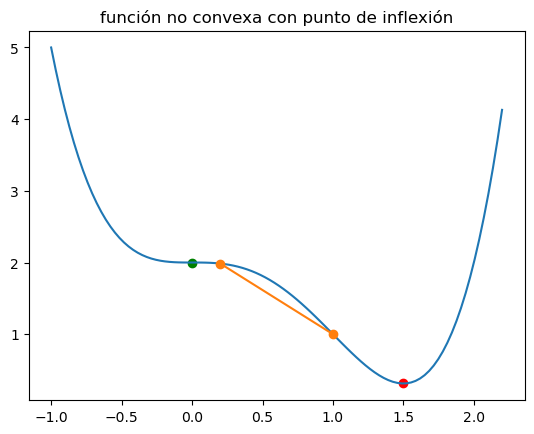

In [4]:
x = np.linspace(-1,2.2,100)
def f_no_conv(x): 
    return 2 + -2*x**3 + x**4 

x1=0.2
x2=1
x3=2
plt.plot(x,f_no_conv(x))
plt.plot([x1,x2],[f_no_conv(x1), f_no_conv(x2)], marker='o')
#plt.plot([x2,x3],[f_no_conv(x2), f_no_conv(x3)])
plt.scatter([1.5],[f_no_conv(1.5)], color='r')
plt.scatter([0],[f_no_conv(0)], color='g')
plt.title('función no convexa con punto de inflexión')
plt.show()

## Descenso por el gradiente

Se trata de bajar por la máxima pendiente de la función. 

En el caso de una dimensión, la pendiente está dada por la derivada, que es el límite del cociente:

$$ 
\frac{df}{dx} = \lim_{x_i \to x} \frac{f(x_i) - f(x)}{x_i - x}
$$

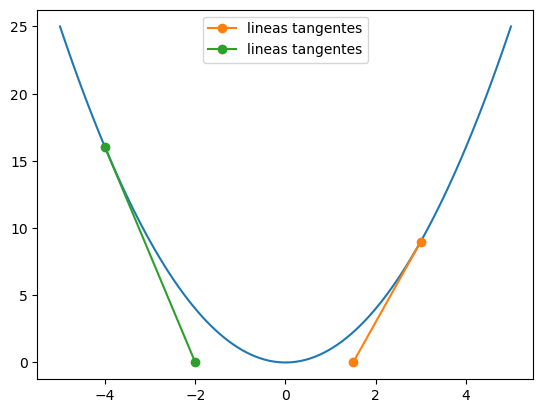

In [5]:
def f(x):
    return x**2

def df(x):
    return 2*x

def lin_f(x,x0):
    return df(x0)*(x-x0) + f(x0)

def zero_lin_f(x):
    return x -f(x)/df(x)  

x = np.linspace(-5,5,100)

x0 = 3
x1 = -4
plt.plot(x,f(x))
plt.plot([x0, zero_lin_f(x0)], [f(x0),0], marker='o', label='lineas tangentes')
plt.plot([x1, zero_lin_f(x1)], [f(x1),0], marker='o', label='lineas tangentes')
plt.legend()

#### Aproximación a líneas tangentes

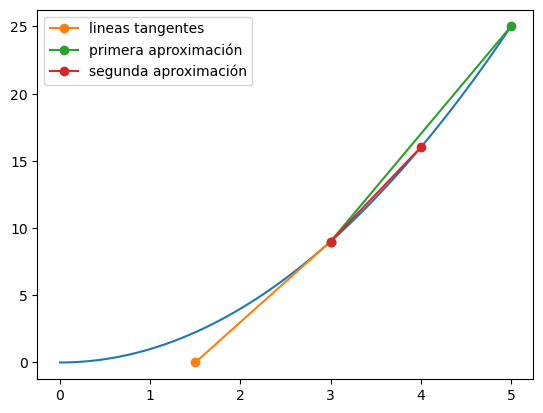

In [6]:
x = np.linspace(0,5,100)

x0 = 3
x1 = 5
x2 = 4
plt.plot(x,f(x))
plt.plot([x0, zero_lin_f(x0)], [f(x0),0], marker='o', label='lineas tangentes')
plt.plot([x0, x1], [f(x0),f(x1)], marker='o', label='primera aproximación')
plt.plot([x0, x2], [f(x0),f(x2)], marker='o', label='segunda aproximación')
plt.legend()

### Descendiendo por el gradiente

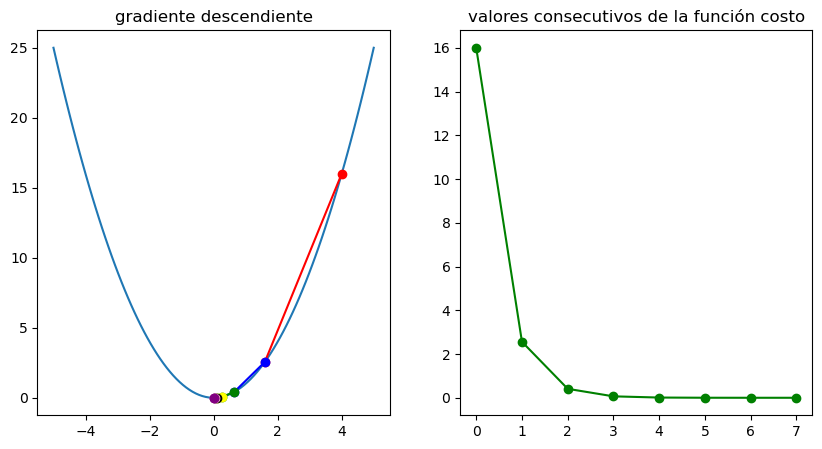

In [7]:
def f(x):
    return x**2

def df(x):
    return 2*x

x = np.linspace(-5,5,100)

a = 0.3 #0.1, 0.3, 0.8 "learning rate"

x1 = 4
x2 = x1 - a*df(x1)
x3 = x2 - a*df(x2)
x4 = x3 - a*df(x3)
x5 = x4 - a*df(x4)
x6 = x5 - a*df(x5)
x7 = x6 - a*df(x6)
x8 = x7 - a*df(x7)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(x,f(x))
ax[0].plot([x1,x2],[f(x1),f(x2)], color='red', marker='o')
ax[0].plot([x2,x3],[f(x2),f(x3)], color='blue', marker='o')
ax[0].plot([x3,x4],[f(x3),f(x4)], color='green', marker='o')
ax[0].plot([x4,x5],[f(x4),f(x5)], color='yellow', marker='o')
ax[0].plot([x5,x6],[f(x5),f(x6)], color='black', marker='o')
ax[0].plot([x6,x7],[f(x6),f(x7)], color='pink', marker='o')
ax[0].plot([x7,x8],[f(x7),f(x8)], color='purple', marker='o')
ax[0].set_title('gradiente descendiente')

ax[1].plot([f(x1),f(x2),f(x3),f(x4),f(x5),f(x6),f(x7),f(x8)], color='green', marker='o')
ax[1].set_title('valores consecutivos de la función costo')
plt.show()


    

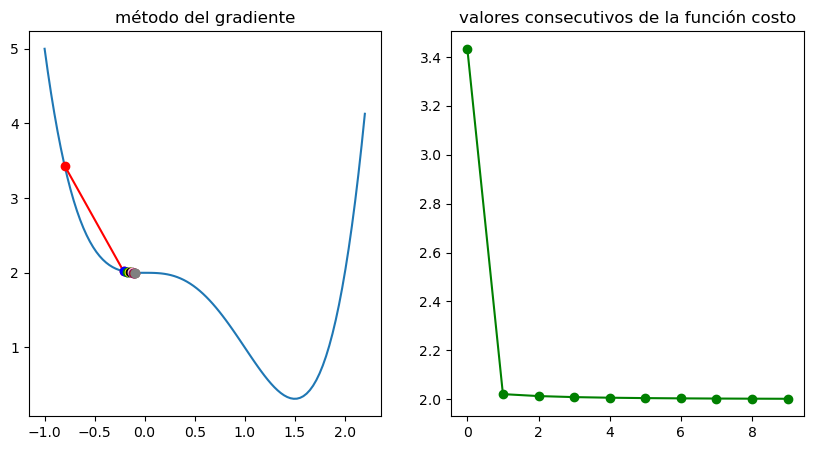

In [8]:
def f(x):
    return 2 + -2*x**3 + x**4

def df(x):
    return -6*x**2 + 4*x**3

x = np.linspace(-1,2.2,100)

a = 0.1 #0.1, 0.4, 0.2

x1 = -0.8
x2 = x1 - a*df(x1)
x3 = x2 - a*df(x2)
x4 = x3 - a*df(x3)
x5 = x4 - a*df(x4)
x6 = x5 - a*df(x5)
x7 = x6 - a*df(x6)
x8 = x7 - a*df(x7)
x9 = x8 - a*df(x8)
x10 = x9 - a*df(x9)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(x,f(x))
axs[0].plot([x1,x2],[f(x1),f(x2)], color='red', marker='o')
axs[0].plot([x2,x3],[f(x2),f(x3)], color='blue', marker='o')
axs[0].plot([x3,x4],[f(x3),f(x4)], color='green', marker='o')
axs[0].plot([x4,x5],[f(x4),f(x5)], color='yellow', marker='o')
axs[0].plot([x5,x6],[f(x5),f(x6)], color='black', marker='o')
axs[0].plot([x6,x7],[f(x6),f(x7)], color='pink', marker='o')
axs[0].plot([x7,x8],[f(x7),f(x8)], color='purple', marker='o')
axs[0].plot([x8,x9],[f(x8),f(x9)], color='brown', marker='o')
axs[0].plot([x9,x10],[f(x9),f(x10)], color='gray', marker='o')
axs[0].set_title('método del gradiente')
#plt.show()
axs[1].plot([f(x1),f(x2),f(x3),f(x4),f(x5),f(x6),f(x7),f(x8),f(x9),f(x10)], color='green', marker='o')
axs[1].set_title('valores consecutivos de la función costo')
plt.show()





### Caso 2-D 

En 2 dimensiones el gradiente se define como:

$$ 
\nabla f = (\frac{\partial f}{\partial x^1}, \frac{\partial f}{\partial x^2})
$$

En n dimensiones como:

$$ 
\nabla f = (\frac{\partial f}{\partial x^1}, \frac{\partial f}{\partial x^2}, \ldots , \frac{\partial f}{\partial x^n})
$$

Donde,

$$
\frac{\partial f}{\partial x^i} = \lim_{y \to x^i} \frac{f(x^1, x^2, \ldots, y, \dots, x^n) - f(x^1, x^2, \ldots, x^i, \dots, x^n)}{y - x^i}
$$

**Esto se hace de manera automática dentro de las librerías que manejan las redes neuronales.**

In [9]:


x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)


Text(0.5, 1.0, 'Contour Plot')

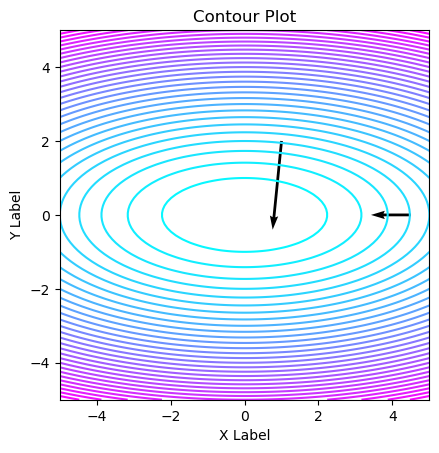

In [10]:
# Define vector components
x1 = 1
y1 = 2
x2 = 4.5
y2 = 0
a = 0.3 # learning rate
c1 = 0.4 # 1, 0.4
c2 = 2 # 1, 2

# Define function to plot
def f(x, y):
    return c1*x**2 + c2*y**2

def grad_f(x, y):
    return 2*c1*x, 2*c2*y

# Create data
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

grad_f_x1, grad_f_y1 = grad_f(x1,y1)
grad_f_x2, grad_f_y2 = grad_f(x2,y2)

# Create plot
fig, ax = plt.subplots()
ax.quiver(x1, y1, - a*grad_f_x1, - a*grad_f_y1, angles='xy', scale_units='xy', scale=1)
ax.quiver(x2, y2, - a*grad_f_x2, - a*grad_f_y2, angles='xy', scale_units='xy', scale=1)
ax.contour(X, Y, Z, cmap='cool', levels=30)

# Set aspect ratio
ax.set_aspect('equal', adjustable='box')

# Add labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Contour Plot')

# Show plot

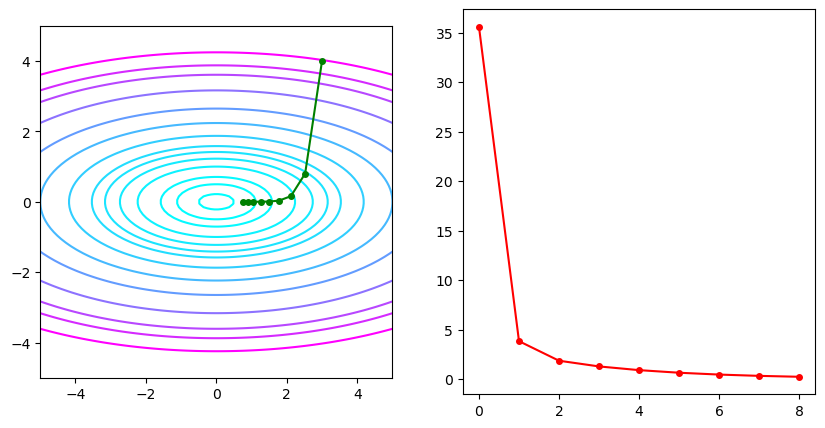

In [11]:
a = 0.2 # 0.2, 0.3, 0.4, 0.5
x0, y0 = 3, 4
x1, y1 = grad_f(x0, y0)
x1, y1 = x0 - a*x1, y0 - a*y1
x2, y2 = grad_f(x1, y1)
x2, y2 = x1 - a*x2, y1 - a*y2
x3, y3 = grad_f(x2, y2)
x3, y3 = x2 - a*x3, y2 - a*y3
x4, y4 = grad_f(x3, y3)
x4, y4 = x3 - a*x4, y3 - a*y4
x5, y5 = grad_f(x4, y4)
x5, y5 = x4 - a*x5, y4 - a*y5
x6, y6 = grad_f(x5, y5)
x6, y6 = x5 - a*x6, y5 - a*y6
x7, y7 = grad_f(x6, y6)
x7, y7 = x6 - a*x7, y6 - a*y7
x8, y8 = grad_f(x7, y7)
x8, y8 = x7 - a*x8, y7 - a*y8

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].contour(X, Y, Z, cmap='cool', levels=[0.1, 0.5, 1, 2, 3, 4, 5, 7, 10, 14, 20,26,30,36])

# Set aspect ratio
ax[0].set_aspect('equal', adjustable='box')
ax[0].plot([x0,x1,x2,x3,x4,x5,x6,x7,x8],[y0,y1,y2,y3,y4,y5,y6,y7,y8], color='green', marker='o', markersize=4)
ax[1].plot([f(x0,y0),f(x1,y1),f(x2,y2),f(x3,y3),f(x4,y4),f(x5,y5),f(x6,y6),f(x7,y7),f(x8,y8)], color='red', marker='o', markersize=4)



## Otros métodos para encontrar mínimos


Basado en `https://www.ruder.io/optimizing-gradient-descent/`

### Repaso:

Recuerden que estamos buscando el mínimo de una función costo sobre los parámetros de la misma.

$$
F = f\_costo(x,y,\theta)
$$

**x e y aquí pueden ser todos los datos o un subconjunto de los mismos**

El algoritmo de descenso por el gradiente clásico sería:

$$
\theta^{t} = \theta^{t-1} - \eta \nabla_{\theta}F(x,y,\theta^{t-1})
$$

```
for i in range(nb_epochs):
  params_grad = evaluate_gradient(loss_function, data, params)
  params = params - learning_rate * params_grad
```

Donde sumamos sobre todas las funciones costo para todos los valores$(x,y)$ de los datos de aprendizaje.

1. Tenemos que evaluar el gradiente en muchos datos y sumar, **si la muestra de aprendizaje es muy grande esto es muy costoso.**

2. No podemos agregar puntos a la muestra en medio del cálculo. 







   



### 1. SGD (Stockastic Gradient Descent)

Alternativamente podemos hacer descensos con cada punto de la muestra, los cuales se toman al azar para cada iteración.

$$
\theta^{t} = \theta^{t-1} - \eta \nabla_{\theta}F(x^i,y^i,\theta^{t-1})
$$

```
for i in range(nb_epochs):
  np.random.shuffle(data)
  for example in data:
    params_grad = evaluate_gradient(loss_function, example, params)
    params = params - learning_rate * params_grad
```

1. Mucho más rápido (una sola evaluación por iteración).
2. Permite agregar datos dinámicamente.
3. Los gradientes son muy distintos de una iteración a la otra. 
   1. Esto puede ser malo pues afecta la convergencia (pero se puede arreglar tomando pasos muy chicos cuando se está cerca del mínimo)
   2. Permite saltar de un mínimo local a otro por el ruido que genera. (Puede ser útil!)
   
   



### Mini-Batch GD

En este esquema se toman grupos de muestras, típicamente entre 50 y 100 datos, para cada iteración.

$$
\theta^{t} = \theta^{t-1} - \eta \nabla_{\theta}F(x^{i:i+50},y^{i:i+50},\theta^{t-1})
$$

```
for i in range(nb_epochs):
  np.random.shuffle(data)
  for batch in get_batches(data, batch_size=50):
    params_grad = evaluate_gradient(loss_function, batch, params)
    params = params - learning_rate * params_grad
```

1. Mucho menos ruido. Convergencia más rápida
2. Muy eficiente, no tantas evaluaciones. 

### De ahora en más pensaremos que estamos usando una estrategia del tipo Mini_Batch 

El problema ahora es como mejorar el método del gradiente:

1. Cómo elegir el *learning-rate*
2. Cómo salir de puntos de silla.
3. Cómo prevenir oscilaciones.
4. Cómo moverse por mejores direcciónes que la del gradiente.

#### Método del momento:

\begin{align}
v^t &= \gamma v^{t-1} - \eta \nabla_{\theta}F(\theta^{t-1}) \;\;\;\; \gamma < 1\\ 
\theta^t &= \theta^{t-1} + v^t
\end{align}

Esto se puede escribir como:

\begin{align}
v^t - v^{t-1} &= (\gamma-1) v^{t-1} - \eta \nabla_{\theta}F(\theta^{t-1}) \;\;\;\; \gamma < 1\\ 
\theta^t - \theta^{t-1} &=  v^t
\end{align}

\begin{align}
\frac{d\hat{v}}{dt} &= \frac{(\gamma-1)}{dt} \hat{v} - \frac{\eta}{dt^2} \nabla_{\theta}F(\theta) \;\;\;\; \gamma < 1\\ 
\frac{d\theta^t}{dt} &=  \hat{v} \;\;\;\;\;\; \hat{v} = \frac{v}{dt}
\end{align}

Sistema dinámico de partículas en un potencial $V(\theta) = \frac{\eta}{dt^2} F(\theta)$ 
con un coeficiente de fricción dado por $\frac{(\gamma-1)}{dt} < 0$ (si $\gamma < 1$)


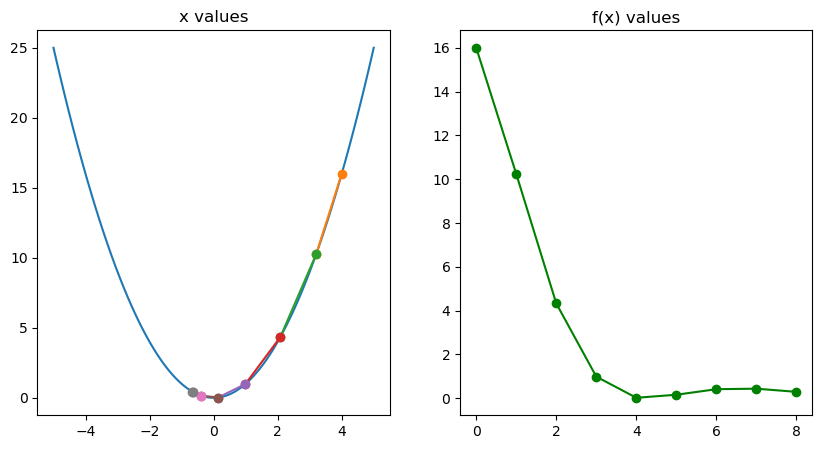

In [12]:
def f(x):
    return x**2

def df(x):
    return 2*x

x_p = np.linspace(-5,5,100)
# Define lists to store values of x and f(x)
x_values = []
f_values = []
v = 0
x = 4
x_values.append(x)
f_values.append(f(x))

a = 0.1 # 0.2, 0.3, 0.4, 0.5
b = 0.6 # 0.8, 0.9, 0.95, 0.99
for i in range(8):
    v = b*v - a*df(x)
    x = x + v
    x_values.append(x)
    f_values.append(f(x))


#Plot values of x and f(x)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_p,f(x_p))
for i in range(7):
    plt.plot([x_values[i],x_values[i+1]],[f(x_values[i]),f(x_values[i+1])], marker='o')
#plt.plot(x_values)
plt.title('x values')
plt.subplot(1, 2, 2)
plt.plot(f_values, color='green', marker='o')
plt.title('f(x) values')
plt.show()


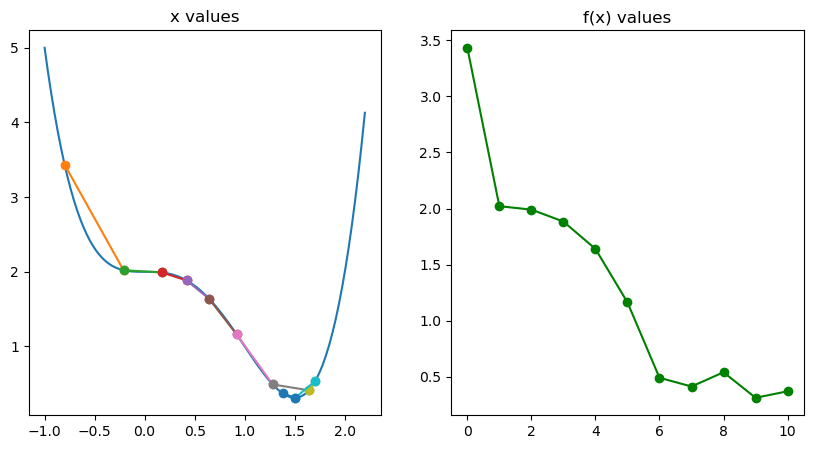

In [13]:
def f(x):
    return 2 -2*x**3 + x**4

def df(x):
    return -6*x**2 + 4*x**3

x_p = np.linspace(-1,2.2,100)

# Define lists to store values of x and f(x)
x_values = []
f_values = []
v = 0
x = -0.8
x_values.append(x)
f_values.append(f(x))

N = 10
a = 0.1 # 0.2, 0.3, 0.4, 0.5
b = 0.6 # 0.8, 0.9, 0.95, 0.99
for i in range(N):
    v = b*v - a*df(x)
    x = x + v
    x_values.append(x)
    f_values.append(f(x))


#Plot values of x and f(x)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_p,f(x_p))
for i in range(N):
    plt.plot([x_values[i],x_values[i+1]],[f(x_values[i]),f(x_values[i+1])], marker='o')
#plt.plot(x_values)
plt.title('x values')
plt.subplot(1, 2, 2)
plt.plot(f_values, color='green', marker='o')
plt.title('f(x) values')
plt.show()


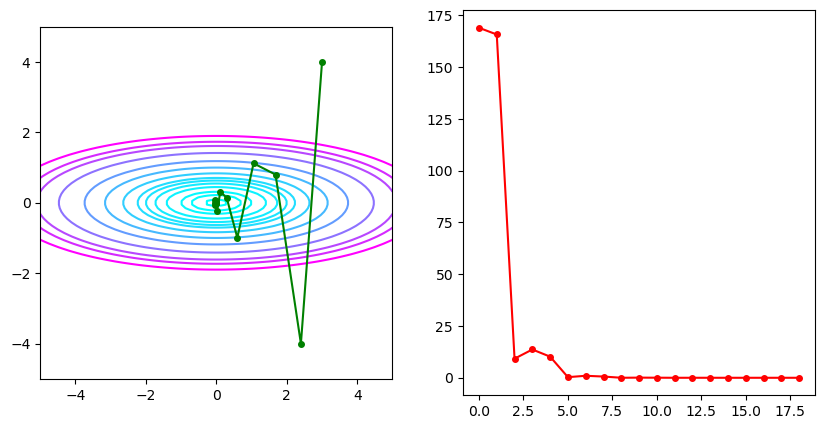

In [69]:
# Define function to plot
c1 = 1
c2 = 10
def f(x, y):
    return c1*x**2 + c2*y**2

def grad_f(x, y):
    return 2*c1*x, 2*c2*y

# Create data
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

x = 3
y = 4
vx = 0
vy = 0

x_values = []
y_values = []
vx_values = []
vy_values = []

x_values.append(x)
y_values.append(y)
f_values = []
f_values.append(f(x,y))
a = 0.1 # 0.2, 0.3, 0.4, 0.5
b = 0.4 # 0.8, 0.9, 0.95, 0.99

# Comparar con estos valores entre el método GD y el método de momentum

for i in range(N):
    vx = b*vx - a*grad_f(x,y)[0]
    vy = b*vy - a*grad_f(x,y)[1]
    x = x + vx
    y = y + vy
    #x = x - a*grad_f(x,y)[0]
    #y = y - a*grad_f(x,y)[1]
    x_values.append(x)
    y_values.append(y)
    f_values.append(f(x,y))


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].contour(X, Y, Z, cmap='cool', levels=[0.1, 0.5, 1, 2, 3, 4, 5, 7, 10, 14, 20,26,30,36])

# Set aspect ratio
ax[0].set_aspect('equal', adjustable='box')
ax[0].plot(x_values,y_values, color='green', marker='o', markersize=4)
ax[1].plot(f_values, color='red', marker='o', markersize=4)


#### Método NAG (Nesterov accelerated gradient)

\begin{align}
v^t &= \gamma v^{t-1} - \eta \nabla_{\theta}F(\theta^{t-1}+\gamma v^{t-1}) \;\;\;\; \gamma < 1\\ 
\theta^t &= \theta^{t-1} + v^t
\end{align}

La idea es que aquí evaluamos el gradiente en un punto cercano a $\theta^t$ y no a $\theta^{t-1}$


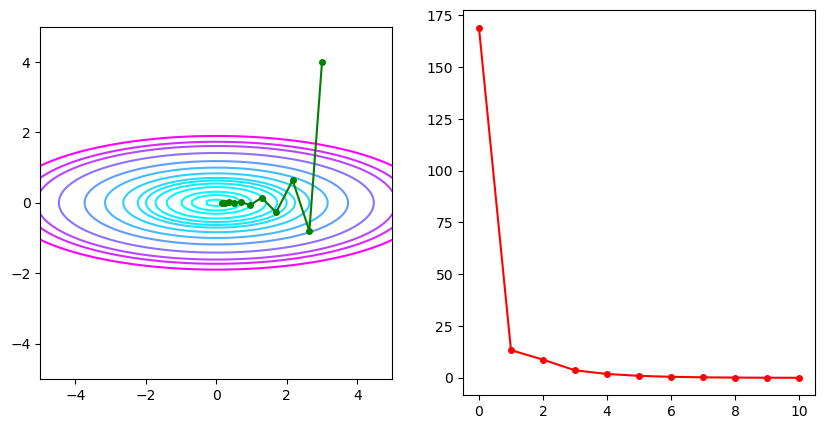

In [15]:
# Define function to plot
c1 = 1
c2 = 10
def f(x, y):
    return c1*x**2 + c2*y**2

def grad_f(x, y):
    return 2*c1*x, 2*c2*y

# Create data
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

x = 3
y = 4
vx = 0
vy = 0

x_values = []
y_values = []
vx_values = []
vy_values = []

x_values.append(x)
y_values.append(y)
f_values = []
f_values.append(f(x,y))
a = 0.06 # 0.2, 0.3, 0.4, 0.5
b = 0.5 # 0.8, 0.9, 0.95, 0.99
N = 10

# Comparar con estos valores entre el método GD y el método de momentum


for i in range(N):
    # Momentum (con a=0.1, b=0.5, N=10, x=3, y=4)
    #vx = b*vx - a*grad_f(x,y)[0]
    #vy = b*vy - a*grad_f(x,y)[1]
    # NAG (con a=0.06, b=0.5, N=10, x=3, y=4)
    xp = x + b*vx
    yp = y + b*vy
    vx = b*vx - a*grad_f(xp,yp)[0]
    vy = b*vy - a*grad_f(xp,yp)[1]
    x = x + vx
    y = y + vy
    # SGD (con a=0.1, b=0.5, N=10, x=3, y=4)
    #x = x - a*grad_f(x,y)[0]
    #y = y - a*grad_f(x,y)[1]
    x_values.append(x)
    y_values.append(y)
    f_values.append(f(x,y))


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].contour(X, Y, Z, cmap='cool', levels=[0.1, 0.5, 1, 2, 3, 4, 5, 7, 10, 14, 20,26,30,36])

# Set aspect ratio
ax[0].set_aspect('equal', adjustable='box')
ax[0].plot(x_values,y_values, color='green', marker='o', markersize=4)
ax[1].plot(f_values, color='red', marker='o', markersize=4)


### Otros métodos: (estos cambian la dirección del gradiente!)

1. Adagrad
2. Adadelta
3. RMSprop
4. **Adam**
5. AdaMax
6. Nadam
7. AMSGrad

**El gradiente no es una entidad matemática propia del problema, depende de las coordenadas**

*Por eso solo nos indica la dirección para donde movernos, pero no mucho más.*

Es por eso que existen muchas alternativas a como elegír direcciones mejores.

### Adam

\begin{align}
m^t &= \beta_m * m^{t-1} - (1-\beta_m) * \nabla F(\theta^{t-1}) \\
v^t &= \beta_v * v^{t-1} + (1-\beta_v) * \nabla F(\theta^{t-1}) \odot \nabla F(\theta^{t-1}) \\
\theta^{t} &= \theta^{t-1} + \frac{\eta }{(1-\beta_m^t)(\sqrt{\frac{|v^{t}|}{1-\beta_v^t}} + \epsilon)} m^t
\end{align}



1.0
0.6212121212121205
0.4477319790202389
0.34848610799097074
0.28427114830842215
0.23933444194192463
0.20613221802905743
0.1806013849440118
0.1603603694740866
0.14392100177639777


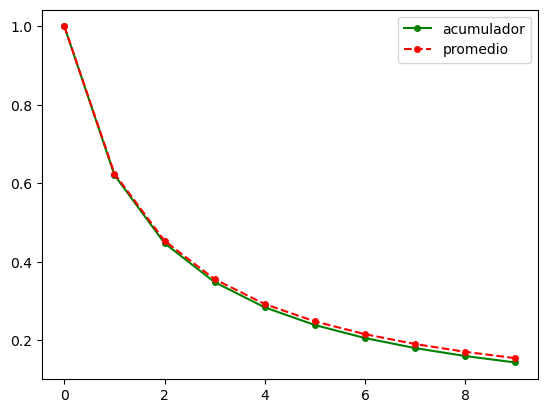

In [71]:
vx_values = []
ave_values = []
b=0.98
s=0
v=0
for i in range(10):
    v = b*v + (1-b)/(i+1)**2
    vx_values.append(v/(1-b**(i+1)))
    print(v/(1-b**(i+1)))
    s = s + 1/(i+1)**2
    ave_values.append(s/(i+1))

plt.plot(vx_values, color='green', marker='o', markersize=4, label='acumulador')
plt.plot(ave_values, color='red', marker='o', markersize=4, label='promedio', linestyle='dashed')
plt.legend()

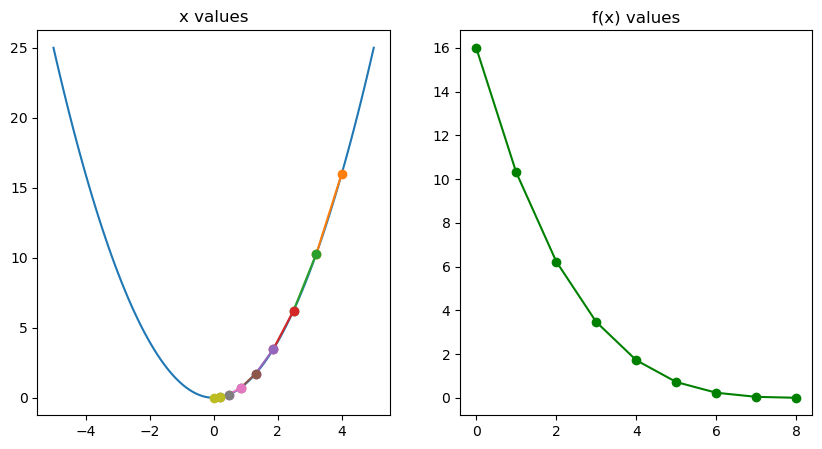

In [16]:
def f(x):
    return x**2

def df(x):
    return 2*x

x_p = np.linspace(-5,5,100)
# Define lists to store values of x and f(x)
x_values = []
f_values = []
v = 0
m = 0
x = 4
x_values.append(x)
f_values.append(f(x))

a = 0.1 # 0.2, 0.3, 0.4, 0.5
bm = 0.6 # 0.8, 0.9, 0.95, 0.99
bv = 0.9 # 0.8, 0.9, 0.95, 0.99
N = 8

for i in range(N):
    m = b*m - df(x)
    v = bv*v + df(x)**2
    x = x + m/(np.sqrt(v/(1-bv**(i+1))) + 1e-8)/(1-bm**(i+1))
    x_values.append(x)
    f_values.append(f(x))


#Plot values of x and f(x)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_p,f(x_p))
for i in range(N):
    plt.plot([x_values[i],x_values[i+1]],[f(x_values[i]),f(x_values[i+1])], marker='o')
#plt.plot(x_values)
plt.title('x values')
plt.subplot(1, 2, 2)
plt.plot(f_values, color='green', marker='o')
plt.title('f(x) values')
plt.show()


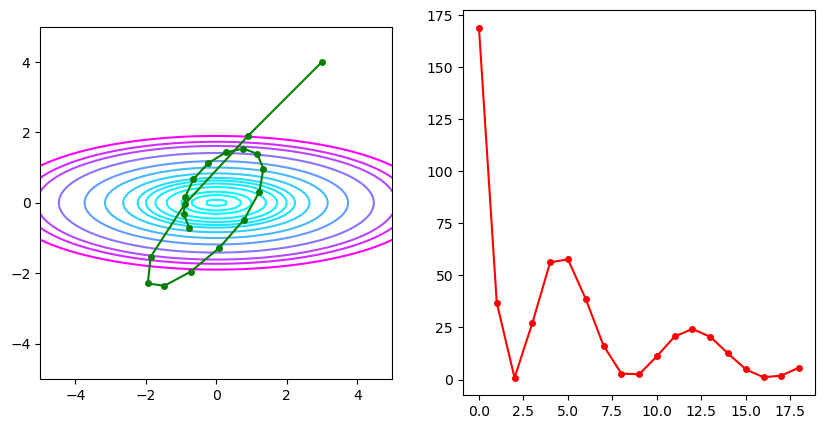

In [78]:
# Define function to plot
c1 = 1
c2 = 10
def f(x, y):
    return c1*x**2 + c2*y**2

def grad_f(x, y):
    return 2*c1*x, 2*c2*y

# Create data
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

x = 3
y = 4
vx = 0
vy = 0
mx = 0
my = 0
N = 18

x_values = []
y_values = []

x_values.append(x)
y_values.append(y)
f_values = []
f_values.append(f(x,y))
a = 2.1 # 0.2, 0.3, 0.4, 0.5
bm = 0.9 # 0.8, 0.9, 0.95, 0.99
bv = 0.99

# Comparar con estos valores entre el método GD y el método de momentum

for i in range(N):
    # Adam (con a=2.0, bm=0.5, bv=0.5, N=18, x=3, y=4)
    gx, gy = grad_f(x,y)
    mx = bm*mx - (1-bm)*gx
    my = bm*my - (1-bm)*gy
    vx = bv*vx + (1-bv)*gx**2
    vy = bv*vy + (1-bv)*gy**2
    mxh = mx/(1-bm**(i+1))
    myh = my/(1-bm**(i+1))
    vxh = vx/(1-bv**(i+1))
    vyh = vy/(1-bv**(i+1))
    x = x + a*mxh/(math.sqrt(vxh)+1e-8)
    y = y + a*myh/(math.sqrt(vyh)+1e-8)
    # SGD (con a=0.1, N=18, x=3, y=4)
    #x = x - a*grad_f(x,y)[0]
    #y = y - a*grad_f(x,y)[1]
    x_values.append(x)
    y_values.append(y)
    f_values.append(f(x,y))


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].contour(X, Y, Z, cmap='cool', levels=[0.1, 0.5, 1, 2, 3, 4, 5, 7, 10, 14, 20,26,30,36])

# Set aspect ratio
ax[0].set_aspect('equal', adjustable='box')
ax[0].plot(x_values,y_values, color='green', marker='o', markersize=4)
ax[1].plot(f_values, color='red', marker='o', markersize=4)


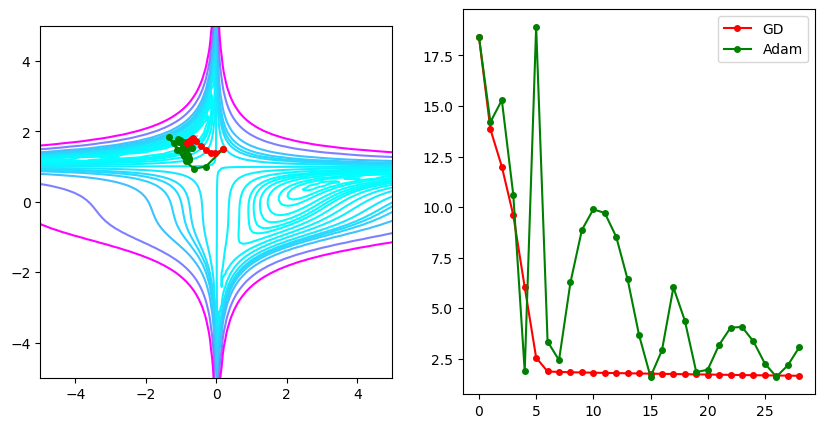

In [76]:
def beal(x,y):
    return (1.5-x+x*y)**2 + (2.25-x+x*y**2)**2 + (2.625-x+x*y**3)**2

def grad_beal(x,y):
    return 2*(1.5-x+x*y)*(y-1) + 2*(2.25-x+x*y**2)*(y**2-1) + 2*(2.625-x+x*y**3)*(y**3-1), 2*(1.5-x+x*y)*x + 2*(2.25-x+x*y**2)*(2*y*x) + 2*(2.625-x+x*y**3)*(3*y**2*x)

#Global minima at (3,0.5)

#beal(3,0.5) = 0

# Create data
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = beal(X, Y)

#try with x = 0.5, y = 1.5, a_ad = 0.5, a_gd = 0.05, bm = 0.9, bv = 0.9, N = 28
#try with x = 0.2, y = 1.5, a_ad = 0.5, a_gd = 0.01, bm = 0.9, bv = 0.9, N = 28
# va al otro minimo
x = 0.2
x_gd = x
y = 1.5
y_gd = y
vx = 0
vy = 0
mx = 0
my = 0
N = 28

x_values_gd = []
y_values_gd = []
x_values_ad = []
y_values_ad = []

x_values_gd.append(x_gd)
y_values_gd.append(y_gd)
x_values_ad.append(x)
y_values_ad.append(y)

f_values_gd = []
f_values_ad = []
f_values_gd.append(beal(x_gd,y_gd))
f_values_ad.append(beal(x,y))
a_ad = 0.5 # 0.2, 0.3, 0.4, 0.5
a_gd = 0.01 # 0.2, 0.3, 0.4, 0.5
bm = 0.9 # 0.8, 0.9, 0.95, 0.99
bv = 0.999

# Comparar con estos valores entre el método GD y el método de momentum

for i in range(N):
    # Adam (con a=0.15, bm=0.9, bv=0.9, N=10, x=0, y=0)
    gx, gy = grad_beal(x,y)
    gx_gd, gy_gd = grad_beal(x_gd,y_gd)
    mx = bm*mx - (1-bm)*gx
    my = bm*my - (1-bm)*gy
    vx = bv*vx + (1-bv)*gx**2
    vy = bv*vy + (1-bv)*gy**2
    mxh = mx/(1-bm**(i+1))
    myh = my/(1-bm**(i+1))
    vxh = vx/(1-bv**(i+1))
    vyh = vy/(1-bv**(i+1))
    x = x + a_ad*mxh/(math.sqrt(vxh)+1e-8)
    y = y + a_ad*myh/(math.sqrt(vyh)+1e-8)
    # SGD (con a=0.05, N=10, x=0, y=0)
    x_gd = x_gd - a_gd*gx_gd
    y_gd = y_gd - a_gd*gy_gd  
    x_values_ad.append(x)
    y_values_ad.append(y)
    f_values_ad.append(beal(x,y))
    x_values_gd.append(x_gd)
    y_values_gd.append(y_gd)
    f_values_gd.append(beal(x_gd,y_gd))


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].contour(X, Y, Z, cmap='cool', levels=[0.1, 0.5, 1, 2, 3, 4, 5, 7, 10, 14, 20,26,30,36,50,100,200])

# Set aspect ratio
ax[0].set_aspect('equal', adjustable='box')
ax[0].plot(x_values_ad,y_values_ad, color='green', marker='o', markersize=4)
ax[0].plot(x_values_gd,y_values_gd, color='red', marker='o', markersize=4)
ax[1].plot(f_values_gd, color='red', marker='o', markersize=4, label='GD')
ax[1].plot(f_values_ad, color='green', marker='o', markersize=4, label='Adam')
ax[1].legend()


![contours](contours_evaluation_optimizers.gif)

![saddle_point](saddle_point_evaluation_optimizers.gif)